In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Input

In [3]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = 10000)

X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [4]:
input_layer = Input(shape=(100,))
embedding_layer = Embedding(10000, 32)(input_layer)
rnn_layer1 = SimpleRNN(64, return_sequences=True)(embedding_layer)
rnn_layer2 = SimpleRNN(32, return_sequences=False)(rnn_layer1)  # Change return_sequences to False
output_layer = Dense(1, activation='sigmoid')(rnn_layer2)
model = Model(input_layer, output_layer)

In [5]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 100, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,345 (1.26 MB)

 Trainable params: 329,345 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile('rmsprop', 'binary_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data = (X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 93ms/step - acc: 0.6348 - loss: 0.6121 - val_acc: 0.8184 - val_loss: 0.4209
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - acc: 0.8348 - loss: 0.3907 - val_acc: 0.7828 - val_loss: 0.4606
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - acc: 0.8516 - loss: 0.3574 - val_acc: 0.8350 - val_loss: 0.3917
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - acc: 0.8679 - loss: 0.3249 - val_acc: 0.8244 - val_loss: 0.4064
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - acc: 0.8689 - loss: 0.3182 - val_acc: 0.7513 - val_loss: 0.5365
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - acc: 0.8441 - loss: 0.3652 - val_acc: 0.8324 - val_loss: 0.4091
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - acc: 0.8860 - loss: 0.2831 - val_acc: 0.8113 - val_loss: 0.4305
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - acc: 0.9013 - loss: 0.2604 - val_acc: 0.8182 - val_loss: 0.5421
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━

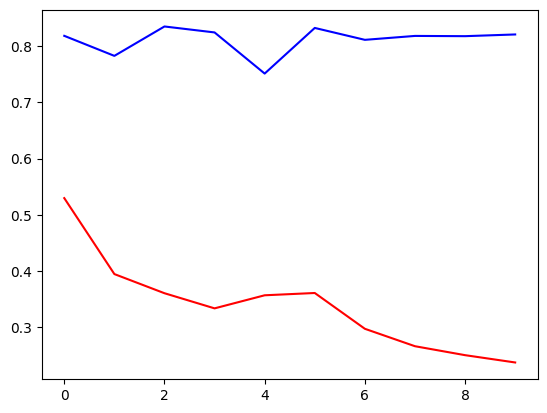

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'loss',color = 'red')
plt.plot(history.history['val_acc'],label = 'val_accuracy',color = 'blue')